In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf

# Go Offline
init_notebook_mode()
cf.go_offline()

In [50]:
df = pd.read_csv('./flyertalk_cx.csv')

In [51]:
df.head()

id                                         thread_url  \
0  490601  http://www.flyertalk.com/forum/cathay-pacific-...   
1  490602  http://www.flyertalk.com/forum/cathay-pacific-...   
2  490600  http://www.flyertalk.com/forum/cathay-pacific-...   
3  490598  http://www.flyertalk.com/forum/cathay-pacific-...   
4  490599  http://www.flyertalk.com/forum/cathay-pacific-...   

                                        thread_title             datehere  \
0  Transferring from international Cathay flight ...  2005-12-11 03:38:00   
1  Transferring from international Cathay flight ...  2005-12-11 05:07:00   
2  Transferring from international Cathay flight ...  2005-12-10 19:01:00   
3  Transferring from international Cathay flight ...  2005-12-10 07:43:00   
4  Transferring from international Cathay flight ...  2005-12-10 11:43:00   

     posted_by                                            content  \
0  Norway_Asia  Looks like you changed you mind in 8 minutes t...   
1     glorialf  <div style=\"float:right;padding:5px;\">\n\t<!...   
2      Chiangi  After you clear passport control, pick up lugg...   
3     glorialf  Thanks. One more (actually two more) questions...   
4    Unterwegs  I connected a few month ago from CX to Bangkok...   

                                         content_use     score  
0  ooks like you changed you mind in 8 minutes to...  0.808015  
1                                              /div>  0.000000  
2  fter you clear passport control, pick up lugga...  0.826811  
3  hanks. One more (actually two more) questions....  0.588937  
4   connected a few month ago from CX to Bangkok ...  0.745233

In [52]:
df.shape

(241244, 8)

In [53]:
df.isnull().sum()

id                 0
thread_url         0
thread_title     313
datehere           0
posted_by        124
content           87
content_use     3279
score              0
dtype: int64

In [54]:
df.dtypes

id                int64
thread_url       object
thread_title     object
datehere         object
posted_by        object
content          object
content_use      object
score           float64
dtype: object

In [55]:
df.describe()

id          score
count  2.412440e+05  241244.000000
mean   5.761595e+05       0.539324
std    8.800896e+04       0.332535
min    4.433190e+05       0.000000
25%    5.037538e+05       0.239704
50%    5.763695e+05       0.573069
75%    6.435402e+05       0.848841
max    1.445178e+06       1.000000

Cleaning the Data:
- Remove the missing values
- Change datehere to time datatype

EDA
- Idenify the top users by number of posts they made e.g. value_count of posted_by
- remove infrequent users (e.g. less than 5 post)
- Track the change of sentiment of top users over time e.g. sentiment vs time
- distribution of scores
- length of post vs sentiment
- length of post vs frequency of post
- most common words

What problem I'm trying to solve (problem statement)
What the result should looks like? (expected result)
What other data do I need?

Research on NPL

In [56]:
df = df.dropna(how='any')
df.shape

(237616, 8)

In [57]:
df['datehere'] = pd.to_datetime(df['datehere'])
df.dtypes

id                       int64
thread_url              object
thread_title            object
datehere        datetime64[ns]
posted_by               object
content                 object
content_use             object
score                  float64
dtype: object

In [115]:
df.posted_by.value_counts().value_counts()

# percysmith with 11k post is probably the moderator
# need to remove all the people with infrequent post to remove the long tails and get a better picture

15     88
16     63
17     57
18     55
21     49
20     42
19     37
23     36
26     35
22     34
29     33
25     31
34     29
27     28
24     27
28     27
31     24
30     23
32     21
35     19
38     19
39     18
37     16
43     16
36     15
33     14
42     14
53     13
47     13
40     12
       ..
442     1
439     1
431     1
429     1
419     1
405     1
391     1
381     1
379     1
375     1
374     1
367     1
358     1
354     1
348     1
346     1
343     1
336     1
324     1
323     1
308     1
305     1
304     1
300     1
299     1
297     1
294     1
293     1
275     1
184     1
Name: posted_by, dtype: int64

In [112]:
# removing rows whose user post less than 5 times

threshold = 15
value_counts = df['posted_by'].value_counts() # Specific column 
to_remove = value_counts[value_counts < threshold].index
df['posted_by'].replace(to_remove, np.nan, inplace=True)



In [113]:
df2 = df.dropna(how='any')
df2.shape

(211409, 8)

In [92]:
df2.head()

id                                         thread_url  \
2  490600.0  http://www.flyertalk.com/forum/cathay-pacific-...   
4  490599.0  http://www.flyertalk.com/forum/cathay-pacific-...   
5  490597.0  http://www.flyertalk.com/forum/cathay-pacific-...   
6  490595.0  http://www.flyertalk.com/forum/cathay-pacific-...   
7  490596.0  http://www.flyertalk.com/forum/cathay-pacific-...   

                                        thread_title            datehere  \
2  Transferring from international Cathay flight ... 2005-12-10 19:01:00   
4  Transferring from international Cathay flight ... 2005-12-10 11:43:00   
5  Transferring from international Cathay flight ... 2005-12-10 01:57:00   
6  Transferring from international Cathay flight ... 2005-12-09 16:35:00   
7  Transferring from international Cathay flight ... 2005-12-10 01:19:00   

   posted_by                                            content  \
2    Chiangi  After you clear passport control, pick up lugg...   
4  Unterwegs  I connected a few month ago from CX to Bangkok...   
5  Guy Betsy  <div style=\"max-width:75%; width:auto; margin...   
6  Guy Betsy  Unless you take TG, when the transfer is \'int...   
7      tedhl  <div style=\"max-width:75%; width:auto; margin...   

                                         content_use     score  
2  fter you clear passport control, pick up lugga...  0.826811  
4   connected a few month ago from CX to Bangkok ...  0.745233  
5  People who are to clear immigration at CNX wil...  0.909336  
6  nless you take TG, when the transfer is \\\'in...  0.934047  
7  assuming on the BKK-ChiangMai flight there\'s ...  0.279150

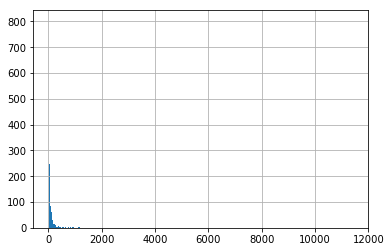

In [120]:
df2.posted_by.value_counts().hist(bins=500)
plt.show()

In [121]:
df2.posted_by.value_counts().iplot(kind='bar')


In [122]:
df2.score.iplot(kind='hist')

In [ ]:
df2 = df2.drop('thread_url', axis=1)

In [127]:
df2 = df2.drop('content', axis=1)

In [128]:
df2.head()

id                                       thread_title  \
2  490600.0  Transferring from international Cathay flight ...   
4  490599.0  Transferring from international Cathay flight ...   
5  490597.0  Transferring from international Cathay flight ...   
6  490595.0  Transferring from international Cathay flight ...   
7  490596.0  Transferring from international Cathay flight ...   

             datehere  posted_by  \
2 2005-12-10 19:01:00    Chiangi   
4 2005-12-10 11:43:00  Unterwegs   
5 2005-12-10 01:57:00  Guy Betsy   
6 2005-12-09 16:35:00  Guy Betsy   
7 2005-12-10 01:19:00      tedhl   

                                         content_use     score  
2  fter you clear passport control, pick up lugga...  0.826811  
4   connected a few month ago from CX to Bangkok ...  0.745233  
5  People who are to clear immigration at CNX wil...  0.909336  
6  nless you take TG, when the transfer is \\\'in...  0.934047  
7  assuming on the BKK-ChiangMai flight there\'s ...  0.279150

In [130]:
# Add features: title length and content length to DF

df2['title_len'] = df2.thread_title.apply(lambda x : len(x.split(' ')))
df2['content_len'] = df2.content_use.apply(lambda x : len(x.split(' ')))

In [131]:
df2.head()

id                                       thread_title  \
2  490600.0  Transferring from international Cathay flight ...   
4  490599.0  Transferring from international Cathay flight ...   
5  490597.0  Transferring from international Cathay flight ...   
6  490595.0  Transferring from international Cathay flight ...   
7  490596.0  Transferring from international Cathay flight ...   

             datehere  posted_by  \
2 2005-12-10 19:01:00    Chiangi   
4 2005-12-10 11:43:00  Unterwegs   
5 2005-12-10 01:57:00  Guy Betsy   
6 2005-12-09 16:35:00  Guy Betsy   
7 2005-12-10 01:19:00      tedhl   

                                         content_use     score  title_len  \
2  fter you clear passport control, pick up lugga...  0.826811         11   
4   connected a few month ago from CX to Bangkok ...  0.745233         11   
5  People who are to clear immigration at CNX wil...  0.909336         11   
6  nless you take TG, when the transfer is \\\'in...  0.934047         11   
7  assuming on the BKK-ChiangMai flight there\'s ...  0.279150         11   

   content_len  
2           87  
4          282  
5           53  
6           38  
7           44

In [132]:
len(df2.posted_by.value_counts())

1591

In [148]:
len(y)

211409

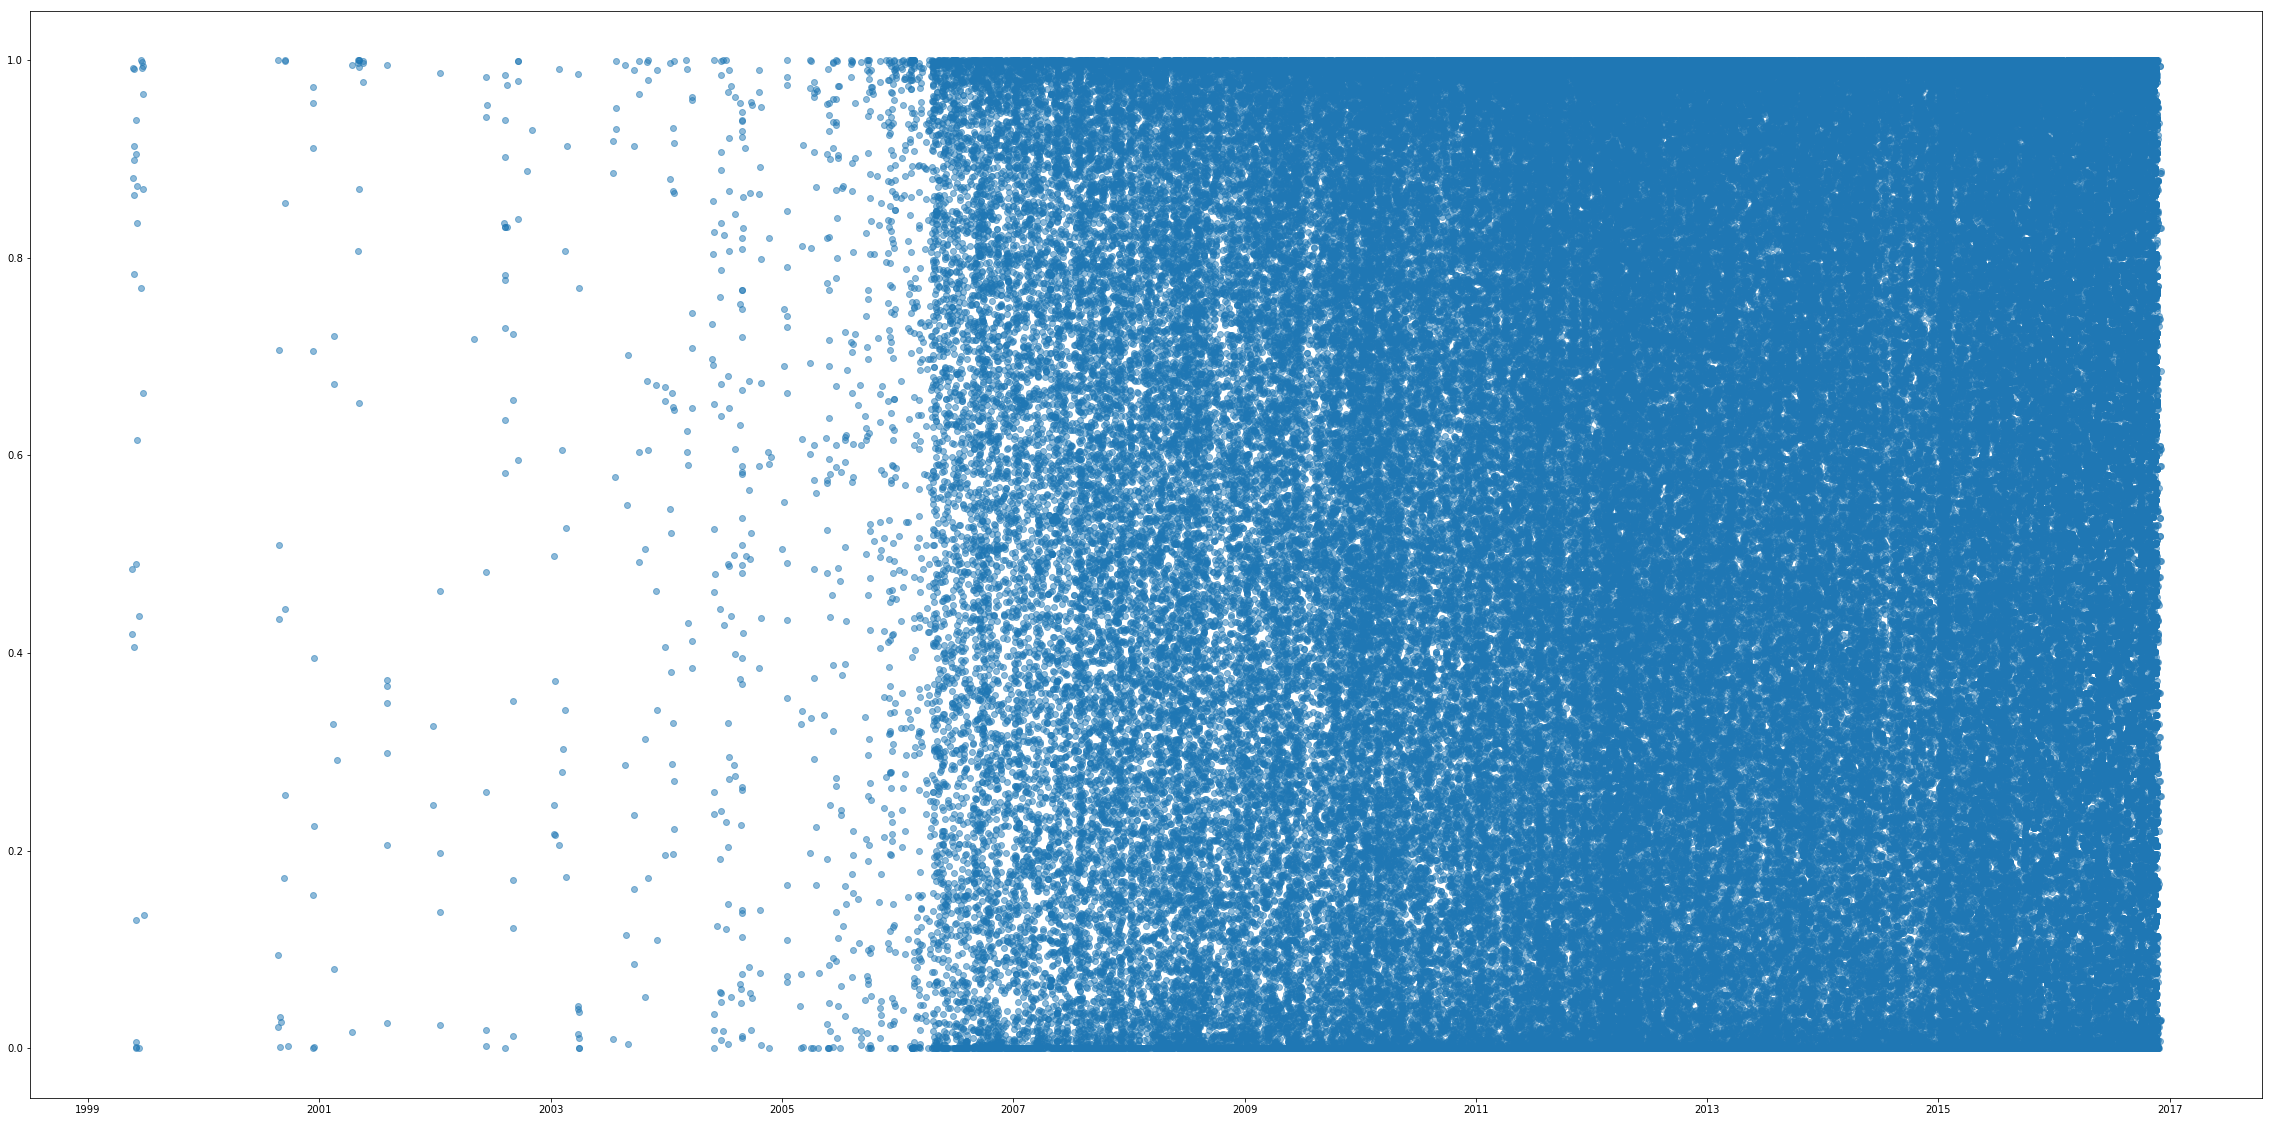

In [173]:
plt.plot_date(df2['datehere'], df2['score'], alpha = 0.5)
plt.show()
plt.figure(figsize=(40,20))